# Shopping Basket Recommendation System with Python

## Introduction

Artificial intelligence is commonly used in various trade circles to automate processes, gather insights on business, and speed up processes. You will use Python to study the usage of artificial intelligence in real-life scenarios - how AI actually impacts businesses.

Shopping basket basically contains a list of items bought by a person. A collection of such lists can be very informative for a shop since the data would indicate information like which products are in demand, what products are seasonal, etc. Businesses can identify which products need to be focused on and make recommendation based on the analysis. Shopping basket recommendation is the case where we can use AI to study the shopping list of a person and suggest to that person some things that he is likely to buy.

In this notebook, we will focus on shopping basket recommendation system using the KNN Model.

## Context

We will be working with Amazon product reviews, obtained from [Kaggle](https://www.kaggle.com/saurav9786/recommender-system-using-amazon-reviews/data?select=ratings_Electronics+%281%29.csv). Kaggle is a platform for data enthusiasts to gather, share knowledge and compete for many prizes!



## Customer Review Data

Big e-commerce companies like Amazon and Walmart deal with millions and millions of customers every day. The customers browse for products, buy them and sometimes leave reviews. Given that, the customer is the most important element for e-commerce companies; keeping them satisfied is primary.

Imagine that you know the shopping history of customers - what they buy and what are their preferences. You can use this information to your advantage by predicting what they might want to buy in the future and suggesting those things.


### Side note: What is KNN?

KNN (K-Nearest Neighbors) is an algorithm used for both classification and regression. It assumes that similar things exist nearby, just like the saying, "Birds of a feather flock together." KNN algorithm classifies a new data point based on the class of its nearest neighbors, specifically k number of them. k denotes the number of nearest neighbors that helps in deciding the class of an object. The following diagram would make it clear:


![Knn where k = 3](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

## Use Python to open csv files

We will use the [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) and [scikit-learn](https://scikit-learn.org/stable/) libraries to work with our dataset. Pandas is a popular Python library for data science. It offers powerful and flexible data structures to make data manipulation and analysis easier. Scikit-learn is a very useful machine learning library that provides efficient tools for predictive data analysis. Matplotlib is a Python 2D plotting library that we can use to produce high quality data visualization. It is highly usable (as you will soon find out); you can create simple and complex graphs with just a few lines of codes!

## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
%matplotlib inline

Now that we have imported the libraries, let's start by reading the csv file.

In [2]:
electronics_data=pd.read_csv(r"https://raw.githubusercontent.com/tvlaz2020/cis230Week5/main/Recommendation.csv",
                             names=['userId', 'productId','Rating','timestamp'])

Let's explore our data to see how it looks like.

In [7]:
electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5,1365811200
1,A2CX7LUOHB2NDG,0321732944,5,1341100800
2,A2NWSAGRHCP8N5,0439886341,1,1367193600
3,A2WNBOD3WNDNKT,0439886341,3,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1,1334707200


### Task 1: Display the first 20 rows (11 to 20) of electronic data

In [8]:
top20_rows = electronics_data.head(20)
print(top20_rows)

            userId   productId  Rating   timestamp
0    AKM1MP6P0OYPR  0132793040       5  1365811200
1   A2CX7LUOHB2NDG  0321732944       5  1341100800
2   A2NWSAGRHCP8N5  0439886341       1  1367193600
3   A2WNBOD3WNDNKT  0439886341       3  1374451200
4   A1GI0U4ZRJA8WN  0439886341       1  1334707200
5   A1QGNMC6O1VW39  0511189877       5  1397433600
6   A3J3BRHTDRFJ2G  0511189877       2  1397433600
7   A2TY0BTJOTENPG  0511189877       5  1395878400
8   A34ATBPOK6HCHY  0511189877       5  1395532800
9    A89DO69P0XZ27  0511189877       5  1395446400
10   AZYNQZ94U6VDB  0511189877       5  1401321600
11  A1DA3W4GTFXP6O  0528881469       5  1405641600
12  A29LPQQDG7LD5J  0528881469       1  1352073600
13   AO94DHGC771SJ  0528881469       5  1370131200
14   AMO214LNFCEI4  0528881469       1  1290643200
15  A28B1G1MSJ6OO1  0528881469       4  1280016000
16  A3N7T0DY83Y4IG  0528881469       3  1283990400
17  A1H8PY3QHMQQA0  0528881469       2  1290556800
18   A2CPBQ5W4OGBX  0528881469 

## Getting information about dataset

If we can gather information about the dynamics of the datasets, that would give us a clear picture of the dataset and guide us in dealing with it.

In [9]:
#Shape of the data
electronics_data.shape

(563366, 4)

In [10]:
#Taking subset of the dataset
electronics_data=electronics_data.iloc[:1048576,0:]

In [11]:
#Check the datatypes
electronics_data.dtypes

userId       object
productId    object
Rating        int64
timestamp     int64
dtype: object

In [12]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563366 entries, 0 to 563365
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     563366 non-null  object
 1   productId  563366 non-null  object
 2   Rating     563366 non-null  int64 
 3   timestamp  563366 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 17.2+ MB


In [13]:
electronics_data.describe()['timestamp'].T

count    5.633660e+05
mean     1.238426e+09
std      1.246249e+08
min      9.127296e+08
25%      1.137974e+09
50%      1.254096e+09
75%      1.357862e+09
max      1.406074e+09
Name: timestamp, dtype: float64

### Task 2: Display information about the Rating column in the dataset

In [16]:
electronics_data.describe()['Rating'].T

count    563366.000000
mean          3.987193
std           1.394318
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [17]:
#Let us find the minimum and maximum ratings to find out whether ratings are in say 1-5 scale or 1-10 scale
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


### Task 3: Check for missing values in the dataset


In [18]:
df = pd.DataFrame(electronics_data)
df.notnull()

,userId,productId,Rating,timestamp
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
563361,True,True,True,True
563362,True,True,True,True
563363,True,True,True,True
563364,True,True,True,True


In [24]:
# Let us check the distribution of the rating to find out different ratings distributions

with sns.axes_style('white'):
    g = sns.catplot("Rating", data=electronics_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

TypeError: ignored

In [25]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of products  :", len(np.unique(electronics_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 563366
Total No of Users   : 450798
Total No of products  : 34015


## Choosing only the dataset that we are interested in.

Sometimes, we do not need the complete dataset for our estimations. Not all attributes of data may be useful for the model we are building. In that case, we can safely drop those attributes. For example, we won't need the timestamp column for our estimations here as it does not help us in any way in recommending the products that users might want to buy.

In [26]:
# We are dropping the timestamp column here as we do not need it
electronics_data.drop(['timestamp'], axis=1,inplace=True)

In [27]:
#Let us do an analysis of rating given by the user

no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     329
A231WM2Z2JL0U3    248
A25HBO5V8S8SEA    160
AT6CZDCP4TRGA      90
AKT8TGIT6VVZ5      90
Name: Rating, dtype: int64

## Viewing the Quantile Distribution

Quantile is a point where a sample is divided into equally sized groups. A median of a sorted dataset is the middle point of that set where sorted means sorted in ascending or descending order. So, a median is a quantile as it divides the dataset into 2 equal groups.

![Median(Quantile example)](https://www.statisticshowto.com/wp-content/uploads/2013/09/median.png)

In [28]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

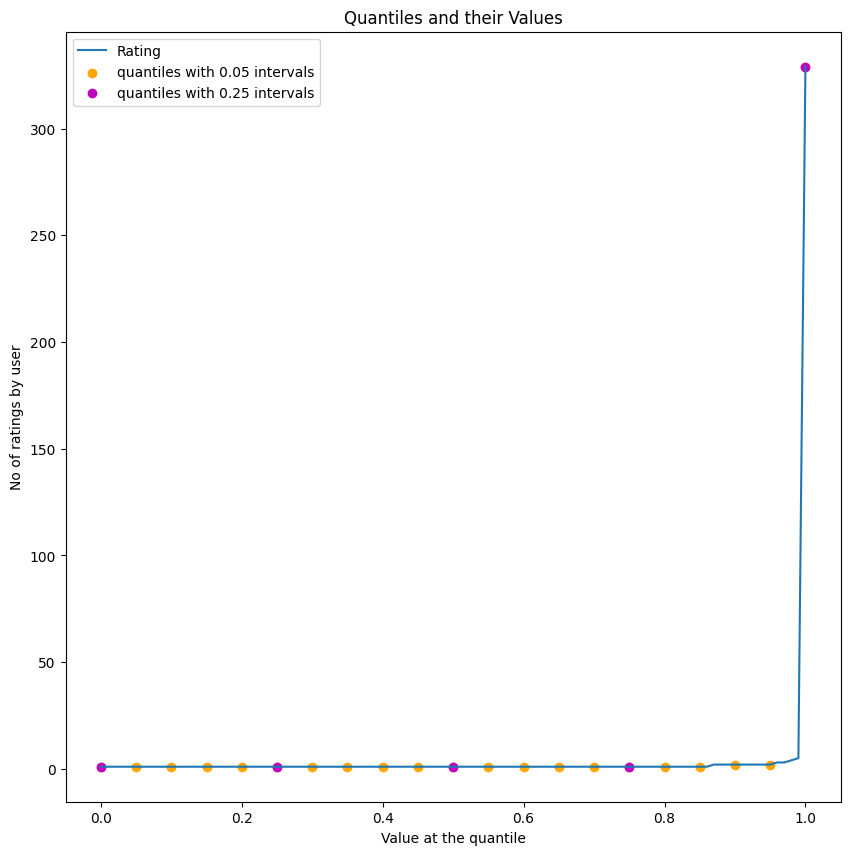

In [29]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
#We find quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
#Let us also find quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [30]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 22



### Task 4: Display products where the number of users who rated is greater than 60

In [32]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 60)) )


 No of rated product more than 50 per user : 14



## Getting a Final Working Dataset Based on Popularity

We are importing the Surprise library which has the KNN function. We would see which products are really popular with the users and use those in recommending new items, as less popular items do not provide much intuition for recommendation.

If you do not have the library installed, please do the below step in your terminal: <br>
pip install surprise

In [46]:
!pip install surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163488 sha256=7fd5223063da78e71625904aa37e8fab6ffff4879ed8cfad9c2f2ea6102cdf00
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [47]:
# POPULARITY BASED
# Let us get the new dataframe which contains products which got more than 50 ratings
# You should try out the case where the new dataframe contains products which have got 60 or more ratings
new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

In [48]:
# Let us read the dataset here
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [49]:
# We are splitting the dataset here
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [50]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [51]:
# Let us run the trained model against the testset
test_pred = algo.test(testset)

## Getting Accuracy

Accuracy

The accuracy of a machine learning algorithm is a measure of how well the algorithm is performing - how  often the algorithm classifies a data point correctly. Accuracy is given by:

![Accuracy](https://miro.medium.com/max/1050/1*O5eXoV-SePhZ30AbCikXHw.png)

Correlation Matrix

A correlation matrix is a table that shows the relation between variables- how one vaiable changes when another variable is changed. If there are 5 variables the correlation matrix will have 5 times 5 or 25 entries, where each entry shows the correlation between two variables.

RMSE

RMSE stands for root mean squared error. When we are doing predictions using our machine learning models, we need to find out if our predictions are correct. RMSE is a way of measuring the error in our predictions - if our RMSE is high, our predictions are bad and vice versa.

In [52]:
#We obtain the RMSE here
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3379


1.3378508352984646

Our final goal is to get a model that can predict. We could use existing user-item interactions to train a model to predict the top-5 items that might be the most suitable for a user. We will take the top 10000 recommendations and use an SVD to get the model.

In [53]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = ratings_matrix.T
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

Finding the correlation matrix.

In [56]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

Suppose, we are considering the book with the id "B00000K135". We would find out the customer who is buying this book and recommend other books to him.

In [59]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

Top items to be recommended to the customer who buys the item "B00000K135".

In [58]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.65])
# We are removing the item already bought by the customer
Recommend.remove(i)
#Here we are printing the recommended items
Recommend[0:24]

['1400501520',
 '9573212919',
 '9625993428',
 '9888002198',
 'B00000J05A',
 'B00000J0D2',
 'B00000J0D5',
 'B00000J1SC',
 'B00000J1U8',
 'B00000J1UQ',
 'B00000J1V3',
 'B00000J3UJ',
 'B00000J434',
 'B00000J4FS',
 'B00000J6WY',
 'B00000JBHP',
 'B00000JCT8',
 'B00000JDHV',
 'B00000JFE3',
 'B00000JFIF',
 'B00000JII6',
 'B00000JSGF',
 'B00000JYLO']

### Task 5: Display recommendation for the customer who buys the item 'B00000JSGF'

In [61]:
j = "B00000JSGF"

product_names = list(X.index)
product_ID = product_names.index(j)
product_ID

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.65])
# We are removing the item already bought by the customer
Recommend.remove(j)
#Here we are printing the recommended items
Recommend[0:24]

['9573212919',
 '9625993428',
 '9888002198',
 'B00000J05A',
 'B00000J0D2',
 'B00000J0D5',
 'B00000J1QR',
 'B00000J1U8',
 'B00000J1UQ',
 'B00000J1V3',
 'B00000J3NF',
 'B00000J3UJ',
 'B00000J434',
 'B00000J4FS',
 'B00000J6WY',
 'B00000JBHP',
 'B00000JCT8',
 'B00000JDF6',
 'B00000JDHV',
 'B00000JFE3',
 'B00000JFIF',
 'B00000JYLO',
 'B00000K135']


### Task 6: Display recommendation for the customer who buys the item 'B00000JDF6'

In [64]:
k = "B00000JDF6"

product_names = list(X.index)
product_ID = product_names.index(k)
product_ID

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.65])
# We are removing the item already bought by the customer
Recommend.remove(k)
#Here we are printing the recommended items
Recommend[0:24]

['B00000J1U8', 'B00000JFE3', 'B00000JFIF', 'B00000JSGF', 'B00000JYLO']

### Conclusion

Artificial intelligence is widely used by different modern-day industries to solve their problems. Here, in this notebook we have seen an example of how artificial intelligence can be used in the e-commerce industry by recommending items to customers based on their shopping habits.